# Final Project

For the following project, you will be working with a movie dataset. The dataset is [here](https://drive.google.com/file/d/1R53inu8Jcb9GGoyiuVnBMVnO7XvCaJAE/view?usp=drive_link). The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R1: Reviewer 2's review
* R1: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

Fill in the answers to questions in the text field, and show your code below.

# Data loading

Load the data

In [389]:
import pandas as pd

data = pd.read_csv('CMSC320FinalProjectData.csv')

data.head()

,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126,1,2020,6.679387e+07,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False
1,1,"""Coffee Shop Serendipity""",131,0,2020,4.667863e+01,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False
2,2,"""The Wedding Date Dilemma""",132,4,2000,3.639134e+01,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False
3,3,"""Heartstrings and Highways""",132,1,2015,9.324732e+01,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False
4,4,"""Falling for Cupid""",119,1,2015,9.213021e+01,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False


# Data Cleaning

List the three biggest data errors below, with a summary of how you fixed them and why you choose that method:


* The first problem I saw was that in the 'Stars' column looked to have a maximum of 5 stars, but some movies had star rating of 100. At first I thought of setting the values to the normal max of 5, but saw that the movies weren't considered success. Instead, I fixed it by replacing the values with the median value of the 'Stars' column (since it is basically a catigorical column). This will allow me to maintain the integrity of the data without skewing it towards an average or removing significant portions of data.

* The 'Budget' column has values ranging from 21 to over 160 million. I suspect that the high values could be errors. I know movies have high bugdes but I believe most of the data coundted the bidget in the millions instead of dollars. While looking up the different movies in the list to find there actual price to see if my guess was correct, I found out that the movies don't actually exist. To fix the wide budget range, I replaced the extremly high budgets with a mean value for the budget made in that year. I made sure to exclude the values about 1,000 when calculate the mean. This would allow for more accurate year-on-year comparisons and trend analysis.

* The 'Runtime' column has some movies with a runtime of 0, which is not possible for a movie. These zero values are likely placeholders for missing or unknown data. I fixed this by replacing the zero values in the 'Runtime' column mean runtime for the film 'Genre'. This would provide a reasonable estimate without introducing extreme values.

In [390]:
# first fix
median_stars = data['Stars'].median()
data.loc[data['Stars'] > 5, 'Stars'] = median_stars
data.head()

# second fix
filtered_budget_data = data[data['Budget'] <= 1000]
mean_budget_per_year = filtered_budget_data.groupby('Year')['Budget'].mean()
data.loc[data['Budget'] > 1000, 'Budget'] = data[data['Budget'] > 1000]['Year'].map(mean_budget_per_year)

# third fix
mean_runtime_per_genre = data[data['Runtime'] > 0].groupby('Genre')['Runtime'].mean()
for genre, mean_runtime in mean_runtime_per_genre.items():
    data.loc[(data['Genre'] == genre) & (data['Runtime'] == 0), 'Runtime'] = mean_runtime
data.head()


/var/folders/w2/gjxl1sr96k56x0nj2_42f53m0000gp/T/ipykernel_857/2319194741.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '129.22596153846155' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Genre'] == genre) & (data['Runtime'] == 0), 'Runtime'] = mean_runtime


,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126.0,1,2020,89.193378,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False
1,1,"""Coffee Shop Serendipity""",131.0,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False
2,2,"""The Wedding Date Dilemma""",132.0,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False
3,3,"""Heartstrings and Highways""",132.0,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False
4,4,"""Falling for Cupid""",119.0,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False


# Data Exploration





Does Season have a stastically significant impact on a movie's success?

Yes, since the p-value is less than 0.05 (the accepted value of acceptance) mean that seasons have a stastically significant impact on a movie's success
SInce the values is so low, there is a very smal probablility that the data is by coincident.

**p-value:**  0.005716268505111858



In [391]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Season'], data['Success'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("P-value:", p_value)

P-value: 0.005716268505111858


Do seasons have a statistically significant difference in their distribution of content ratings?

There is no statistically significant difference in the distribution of content ratings across different seasons.

**p-value:**  0.21507814500508263

In [392]:
contingency_table_rating = pd.crosstab(data['Season'], data['Rating'])

chi2_rating, p_value_rating, dof_rating, expected_rating = chi2_contingency(contingency_table_rating)

print("P-value:", p_value_rating)

P-value: 0.21507814500508263


Who is the harshest critic (highest precent of negative reviews)?

**Critic:**  R1

In [393]:
def is_negative(review):
    negative_words = ["fails", "unconvincing", "struggles", "disjointed", 
                         "lacks", "uninspired", "misses", "lackluster", "underwhelming",
                         "uninteresting", "disconnected", "unsatisfied", "forgettable",
                         "disappointing", "confused", "underdeveloped", "unengaging", 
                         "inconsistent", "poorly", "confusing", "unremarkable", "poor",
                         "unsuccessful", "aimless", "rushed", "sluggish", "flat", "incoherent",
                         "forced", "infuriatingly", "hollow", "superficial", "surface-level",
                         "squanders", "shallow", "uneventful", "incomplete", "frustratingly",
                         "embarrassingly", "dreadfully", "unoriginal", "mess", "jumbled",
                         "convoluted", "predictable", "stumbling", "overuse"]
    return int(any(keyword in review.lower() for keyword in negative_words))

critic_negative_counts = {
    'R1': data['R1'].apply(is_negative).sum(),
    'R2': data['R2'].apply(is_negative).sum(),
    'R3': data['R3'].apply(is_negative).sum()
}

percentages = {critic: (count / len(data)) * 100 for critic, count in critic_negative_counts.items()}

harshest_critic = max(percentages, key=percentages.get)

print("Harshest Critic:", harshest_critic)
print("Percentage of Negative Reviews:", percentages[harshest_critic])

Harshest Critic: R1
Percentage of Negative Reviews: 72.77777777777777


What is the covariance between promotional budget and the filming budget?

**Cov:** 

There is a positive covariance maning that as the promotional budget the filming budget will increase as well.

In [394]:
covariance = data[['Promo', 'Budget']].cov().iloc[0, 1]

print("Covariance: ", covariance)

Covariance:  1847.1214438102459


# Data Visualization

Create a chart that compares the distribution of the budget for each different number of stars. (It does not need to be particularly appealing.

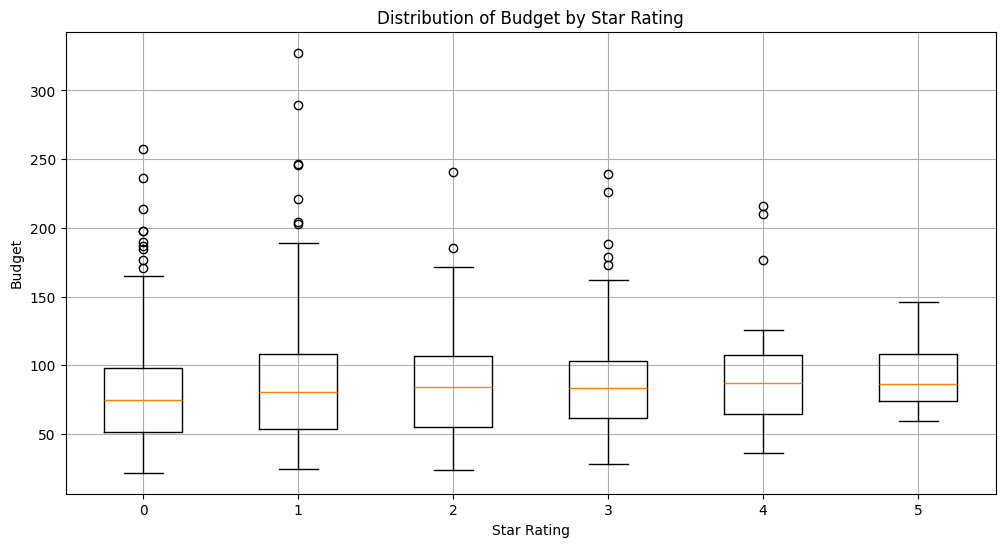

In [395]:
import matplotlib.pyplot as plt

grouped_data = data.groupby('Stars')['Budget'].apply(list)

plt.figure(figsize=(12, 6))
plt.boxplot([grouped_data[star] for star in grouped_data.index], labels=grouped_data.index)
plt.title('Distribution of Budget by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

Create a graph showing the average movie budget over time.

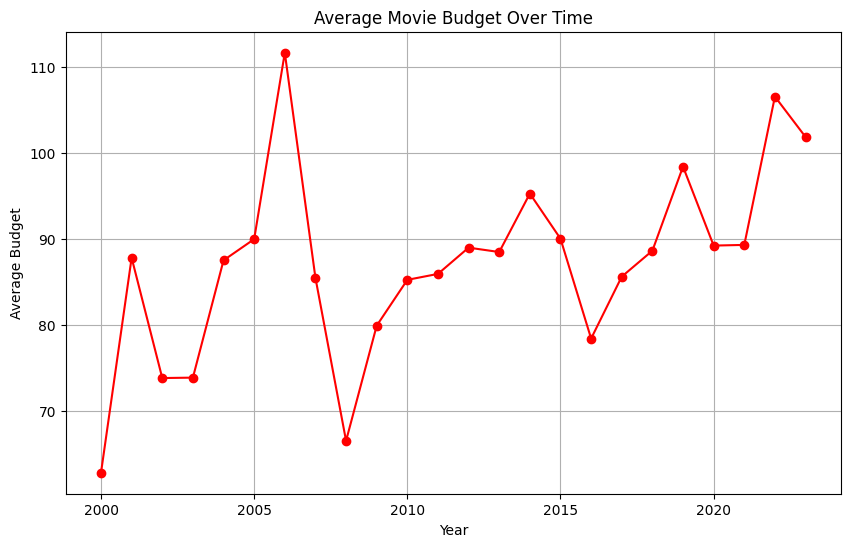

In [396]:
plt.figure(figsize=(10, 6))
data.groupby('Year')['Budget'].mean().plot(kind='line', color='red', marker='o')
plt.title('Average Movie Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.grid(True)
plt.show()

# Feature Engineering

List any features you choose to create (if you are creating many features based on one column, you do not need to list them separately.) You are not required to create any features if you do not wish to. You may create any number of additional features.


* negative/positive review of a movie for each of the reviewers
* short/medium/long movie based on runtime
* I will also change categorical values to ints

In [397]:
#bullet 1
data['R1_Positive'] = ~data['R1'].apply(is_negative)
data['R2_Positive'] = ~data['R2'].apply(is_negative)
data['R3_Positive'] = ~data['R3'].apply(is_negative)

# bullet 2
bins = [0, 90, 120, 180, float('inf')]
labels = [1, 2, 3, 4]

data['Movie_Length'] = pd.cut(data['Runtime'], bins=bins, labels=labels)

#bullet 3
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Genre_Encoded'] = label_encoder.fit_transform(data['Genre'])

data['Rating_Encoded'] = label_encoder.fit_transform(data['Rating'])

data['Season_Encoded'] = label_encoder.fit_transform(data['Season'])

data.head()

,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,...,R2,R3,Success,R1_Positive,R2_Positive,R3_Positive,Movie_Length,Genre_Encoded,Rating_Encoded,Season_Encoded
0,0,"""Love in the Inbox""",126.0,1,2020,89.193378,73.543754,Winter,PG,Romantic Comedy,...,"""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False,-2,-2,-1,3,3,0,3
1,1,"""Coffee Shop Serendipity""",131.0,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,...,"""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False,-2,-2,-1,3,3,0,0
2,2,"""The Wedding Date Dilemma""",132.0,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,...,"""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False,-2,-1,-1,3,3,0,2
3,3,"""Heartstrings and Highways""",132.0,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,...,"""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False,-2,-1,-2,3,3,1,3
4,4,"""Falling for Cupid""",119.0,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,...,"""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False,-2,-1,-1,2,3,1,0


# Modeling

Create a model of your choice.

**Model type choosen:**  Support Vector Machine

In [398]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

features = ['Runtime', 'Stars', 'Year', 'Budget', 'Promo', 'R1_Positive', 'R2_Positive', 'R3_Positive', 
            'Movie_Length', 'Genre_Encoded', 'Season_Encoded']
#######got rid of 'Rating_Encoded' to lower false
X = data[features]
y = data['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7901234567901234
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.82      0.86       131
        True       0.47      0.68      0.55        31

    accuracy                           0.79       162
   macro avg       0.69      0.75      0.71       162
weighted avg       0.83      0.79      0.80       162



# Testing

Shuffle your data and break it into a 10% test set and 90% training set. Show your model's accuracy on the test set. In order to get full credit, the model's accuracy must be higher than 50%.

**Model accuracy:**   0.9444444444444444

In [399]:
data = data.sample(frac=1).reset_index(drop=True)

X = data[features]
y = data['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy on Test Set:", accuracy)

Model Accuracy on Test Set: 0.9444444444444444


Show the confusion matrix for your model. To get full credit, the percent of false negatives and the percent of false positives must be under 30%. (Divide false negatives by total, and divide false positives by total, and make sure both numbers are under 30%).


**False negative rate:**   0.2222222222222222

**False positive rate:**   0.022222222222222223

In [400]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

false_negative_rate = fn / (fn + tp)
false_positive_rate = fp / (fp + tn)

print("Confusion Matrix:\n", cm)
print("False Negative Rate:", false_negative_rate)
print("False Positive Rate:", false_positive_rate)

Confusion Matrix:
 [[44  1]
 [ 2  7]]
False Negative Rate: 0.2222222222222222
False Positive Rate: 0.022222222222222223


What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:**    R1_Positive


In [401]:

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

feature_importance = dict(zip(features, svm_model.coef_[0]))

most_important_feature = max(feature_importance, key=lambda k: abs(feature_importance[k]))

print("Most Important Feature:", most_important_feature)
print("Coefficient Value:", feature_importance[most_important_feature])

Most Important Feature: R1_Positive
Coefficient Value: 1.0093140153767806
